## Task 1

$$
f(x) = \frac{1}{2}x^TAx - b^Tx + c
$$
$A$ is symmetric positive definite.

1.1 **Show that optimal $x_*$ is delivered by solution of equation $Ax_*=b$**

For $x_*$ to be minimizer of $f(x)$, 2 condiitons should be met:
- $\nabla f(x_*) = 0$

- $\nabla^2 f(x_*)$ is positive semidefinite

$$
\nabla f(x_*) = Ax_* - b = 0 =>  Ax_* = b
$$

$$
\nabla^2 f(x_*) = A
$$
, since A is positive definite, this condition is also satisfied.

1.2 **Show that the steepest descent iteration has the form of: $x_{i+1} = x_{i} + \alpha_i r_i$, where $r_i = b - Ax_i$ and find $\alpha$.**


$$
x_{i+1} = x_i - \alpha_i \nabla f(x_i) = x_i - \alpha_i (Ax_i - b)
$$

$$
x_{i+1} = x_i + \alpha_i r_i
$$


To find optimal $\alpha_i$ means minimize $g = (f(x_i + \alpha_i r_i) - f(x_*))$ with respect to $\alpha_i$.

$$
\nabla g = \left(\begin{matrix}
\frac{df(x_1 + \alpha_i r_1)}{d(x_1 + \alpha_i r_1)} r_1\\ \frac{df(x_2 + \alpha_i r_2)}{d(x_2 + \alpha_i r_2)} r_2 \\ ...
\end{matrix}\right) = r_{i}^T (A(x_i + \alpha_i r_i) - b)
$$

Lets minimize:
$$
\nabla g = r_{i}^T A x_i + r_{i}^T A \alpha_i r_i - r_{i}^T b = 0
$$

$$
r_{i}^T A x_i + r_{i}^T A \alpha_i r_i = r_{i}^T b
$$

$$
b = r_i + Ax_i
$$

$$
r_{i}^T A x_i + r_{i}^T A \alpha_i r_i = r_{i}^T (r_i + Ax_i)
$$

$$
\alpha_i r_{i}^T A r_i = r_{i}^T r_i + r_{i}^T Ax_i - r_{i}^T A x_i
$$

$$
\alpha_i = \frac{r_{i}^T r_i}{r_{i}^T A r_i}
$$

1.3 **Generate s 2D plot illustrating the convergence of the steepest descent method**

In [111]:
import numpy as np
import matplotlib.pyplot as plt
import scipy

A = np.array([ [ 3, 2 ], [ 2, 6 ] ])
b = np.array([ 2, -8 ] )
x = np.random.rand(2)

tol = 1e-16

In [112]:
xi = [x]

while np.linalg.norm(A @ xi[-1] - b) > tol:
    ri = b - A @ xi[-1]
    err = np.linalg.norm(ri)
    alpha = ri.dot(ri) / ri.dot(A @ ri)
    print(f"{err=} {ri=} {alpha=}")

    x_next = xi[-1] + alpha *ri
    xi.append(x_next)

err=9.894688076064325 ri=array([-0.40326641, -9.88646693]) alpha=0.16239289628162942
err=3.0066785297750824 ri=array([ 3.00418039, -0.12253974]) alpha=0.3518531011041422
err=1.979548927291526 ri=array([-0.0806782 , -1.97790419]) alpha=0.1623928962816294
err=0.6015214640999694 ri=array([ 0.60102168, -0.02451552]) alpha=0.35185310110414125
err=0.3960320856420247 ri=array([-0.01614062, -0.39570304]) alpha=0.1623928962816296
err=0.12034145592546572 ri=array([ 0.12024147, -0.00490462]) alpha=0.3518531011041421
err=0.07923088472108136 ri=array([-0.00322912, -0.07916505]) alpha=0.16239289628162976
err=0.024075726102192815 ri=array([ 0.02405572, -0.00098123]) alpha=0.3518531011041434
err=0.01585107197440398 ri=array([-0.00064602, -0.0158379 ]) alpha=0.16239289628162867
err=0.00481663266320128 ri=array([ 0.00481263, -0.00019631]) alpha=0.35185310110411183
err=0.003171193703343436 ri=array([-0.00012924, -0.00316856]) alpha=0.16239289628162656
err=0.0009636241130899479 ri=array([ 9.62823472e-04, 

In [113]:
xi = np.array(xi)
xi

array([[ 0.76047604,  0.06091914],
       [ 0.69498844, -1.54457286],
       [ 1.75201863, -1.58768884],
       [ 1.73891706, -1.90888643],
       [ 1.95038841, -1.9175123 ],
       [ 1.94776728, -1.98177166],
       [ 1.99007462, -1.98349736],
       [ 1.98955023, -1.99635321],
       [ 1.99801431, -1.99669845],
       [ 1.9979094 , -1.99927042],
       [ 1.99960274, -1.99933949],
       [ 1.99958175, -1.99985404],
       [ 1.99992052, -1.99986786],
       [ 1.99991632, -1.9999708 ],
       [ 1.9999841 , -1.99997356],
       [ 1.99998326, -1.99999416],
       [ 1.99999682, -1.99999471],
       [ 1.99999665, -1.99999883],
       [ 1.99999936, -1.99999894],
       [ 1.99999933, -1.99999977],
       [ 1.99999987, -1.99999979],
       [ 1.99999987, -1.99999995],
       [ 1.99999997, -1.99999996],
       [ 1.99999997, -1.99999999],
       [ 1.99999999, -1.99999999],
       [ 1.99999999, -2.        ],
       [ 2.        , -2.        ],
       [ 2.        , -2.        ],
       [ 2.        ,

In [114]:
# verify answer is correct
np.linalg.solve(A, b)

array([ 2., -2.])

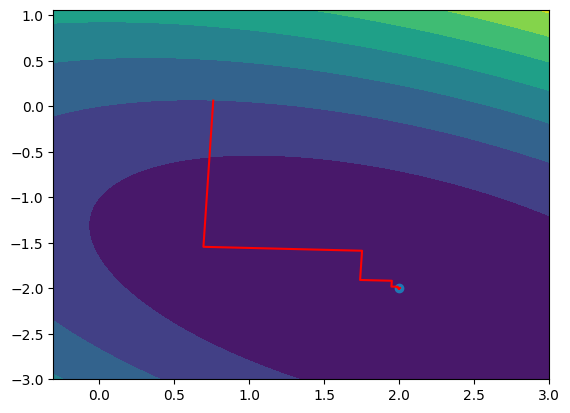

In [115]:
def plot_res(A, b, xi):
    fig,ax = plt.subplots(1)
    X = np.linspace(xi[:,0].min() - 1, xi[:,0].max() + 1)
    Y = np.linspace(xi[:,1].min() - 1, xi[:,1].max() + 1)

    X, Y = np.meshgrid(X, Y)
    def f(x):
        return x.T @ A @ x / 2 - x.T @ b

    F = np.array(
        [
            [ f(np.array([ X[i,j], Y[i,j] ])) for j in range(X.shape[1]) ]
            for i in range(X.shape[0])
        ]
    )
    contour = ax.contourf(X, Y, F)
    plt.plot(xi[:,0], xi[:,1], color='red')
    xStar = np.linalg.solve(A, b)
    plt.scatter(xStar[0], xStar[1])

plot_res(A, b, xi)

### Task 3

In [116]:
A = np.array([ [ 3, 2 ], [ 2, 6 ] ])
b = np.array([ 2, -8 ] )
x = np.random.rand(2)

tol = 1e-16


In [117]:
def conjugate_gradient(A, b, x):
  xi = [x]
  di = []
  r_last = None

  while np.linalg.norm(A @ x - b) > tol:
    ri = b - A @ x
    err = np.linalg.norm(ri)

    d = ri if (r_last is None) else (ri + (ri.dot(ri) / r_last.dot(r_last))*d)
    alpha = ri.dot(ri) / d.dot(A @ ri)
    print(f"{err=} {ri=} {alpha=}")

    x = x + alpha *d
    xi.append(x)
    di.append(d)
    r_last = ri

  return xi, di

In [118]:
xi, di = conjugate_gradient(A, b, x)
xi

err=10.35213437667677 ri=array([  0.93724071, -10.30962007]) alpha=0.17810222427107583
err=4.125742943393676 ri=array([4.10879928, 0.37352821]) alpha=0.40105378650328044
err=1.2560739669470201e-15 ri=array([ 8.8817842e-16, -8.8817842e-16]) alpha=0.39999999999999986


[array([0.12552254, 0.34309583]),
 array([ 0.2924472 , -1.49307043]),
 array([ 2., -2.]),
 array([ 2., -2.])]

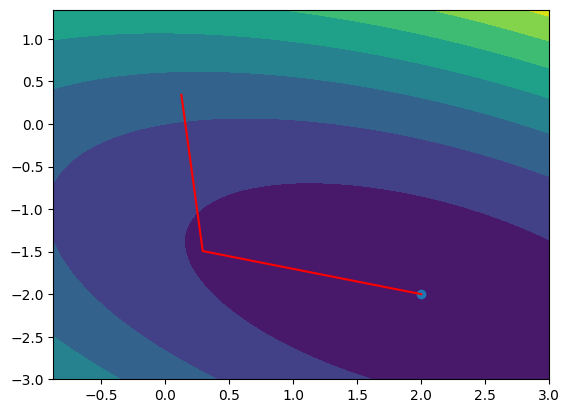

In [119]:
plot_res(A, b, np.array(xi))

This method converges much faster.

Compute $D_{ij} = d_{i}^TAd_j$

In [120]:
D = np.zeros(shape=(len(di), len(di)))
for i in range(len(di)):
  for j in range(len(di)):
    D[i][j] = di[i].dot(A @ di[j])

D

array([[ 6.01714474e+02, -8.88178420e-15,  3.74595652e-14],
       [ 0.00000000e+00,  4.24425736e+01,  8.27217511e-15],
       [ 3.74595652e-14,  8.27217511e-15,  3.94430453e-30]])

### 5.


$$
(A + UCV)^{-1} = A^{-1} - A^{-1}U(C^{-1} + VA^{-1}U)^{-1}VA^{-1}
$$

, where A - (pxp) diagonal matrix, C - (kxk) unit matrix

$(A + UCV)$ - low-rank perturbed diagonal matrix.

In [121]:
p = 5000
k = 100


U = np.random.rand(p, k)
V = np.random.rand(k, p)

A_diag = np.random.rand(p)
A = np.diag(A_diag)

In [122]:
def straighforward(A, U, V):
    return np.linalg.inv(A + U @ V)

def woodbury(A_diag, U, V):
    C = np.eye(k)
    A_inv = np.diag(1 / A_diag)
    return A_inv - A_inv @U @ np.linalg.inv(C + V @A_inv @U) @V @A_inv

In [123]:
%%timeit
straighforward(A, U, V)

14.4 s ± 1.87 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [124]:
%%timeit
woodbury(A_diag, U, V)

9.55 s ± 578 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


So, woodbury calculation is faster than straightforward.

In [125]:
a1 = straighforward(A, U, V)
a2 = woodbury(A_diag, U, V)

In [126]:
print(a1)

[[ 2.20825616e+00  1.14173606e-01 -2.66943670e-01 ... -7.72885680e-01
  -2.70472337e+00 -2.15474030e+00]
 [ 5.45845615e-03  1.98083567e+00  1.33985543e-01 ... -2.07010152e-01
   1.18003488e+00  7.12526768e-01]
 [-5.26808580e-02 -1.33662373e-02  1.35165633e+00 ...  3.77142385e-02
  -3.90088327e-01 -3.68834981e-01]
 ...
 [ 1.11727729e+00 -5.22894787e-01  8.51262539e-01 ...  2.75222877e+01
   7.20704967e+00  8.58308604e+00]
 [-9.79747025e-01  6.09412486e-01 -1.53196489e+00 ... -3.38481220e+00
  -6.57177357e+00 -1.20408118e+01]
 [-3.02916876e-01  3.99761947e-01 -1.03810327e+00 ... -4.34917461e+00
  -1.06910245e+01 -1.26796242e-02]]


In [127]:
print(a2)

[[ 2.20825616e+00  1.14173606e-01 -2.66943670e-01 ... -7.72885679e-01
  -2.70472336e+00 -2.15474030e+00]
 [ 5.45845611e-03  1.98083567e+00  1.33985543e-01 ... -2.07010153e-01
   1.18003488e+00  7.12526768e-01]
 [-5.26808580e-02 -1.33662373e-02  1.35165633e+00 ...  3.77142386e-02
  -3.90088326e-01 -3.68834981e-01]
 ...
 [ 1.11727729e+00 -5.22894787e-01  8.51262537e-01 ...  2.75222877e+01
   7.20704965e+00  8.58308603e+00]
 [-9.79747025e-01  6.09412485e-01 -1.53196489e+00 ... -3.38481220e+00
  -6.57177355e+00 -1.20408118e+01]
 [-3.02916875e-01  3.99761947e-01 -1.03810327e+00 ... -4.34917461e+00
  -1.06910245e+01 -1.26796159e-02]]


## Task 6

In [128]:
n = 10
T = 5000

y = np.load("y.npy")

In [129]:
print(y[:2])

[0.55728471 0.14537225]


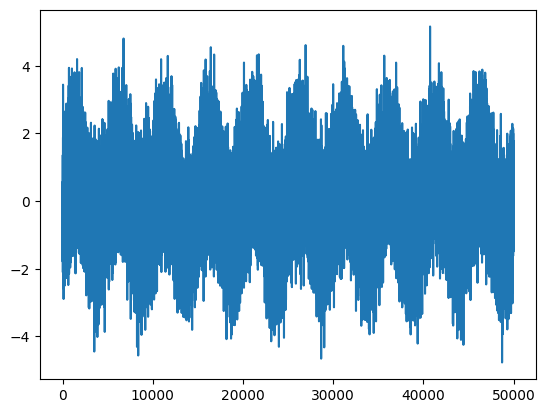

In [130]:
plt.plot(y)

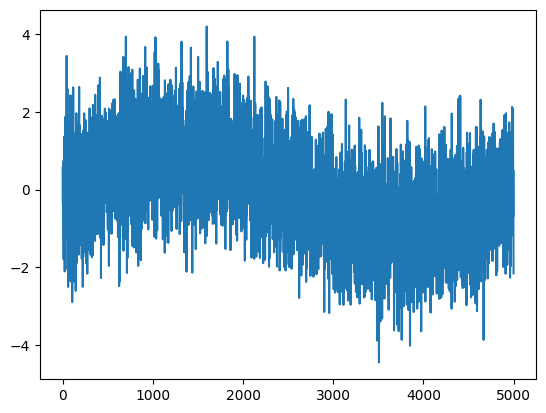

In [131]:
plt.plot(y[0:5000])

1. **Solve the minimization problem analytically and plot it:**

$$
r = \min\limits_Y \left[ \sum\limits_{i=0}^{t-1} |y_i - Y_{i mod T}|^2 \right]
$$

$$
\nabla r = 0
$$

$$
\frac{dr}{dY_j} = \sum\limits_{i=0}^{n}2(y_{iT+j} - Y_j)(-1) = -2\sum\limits_{i=0}^{n-1}(y_{iT+j} - Y_j) = 0
$$

$$
nY_j = \sum\limits_{i=0}^{n-1}y_{iT+j}
$$


$$
Y_j = \frac{1}{n}\sum\limits_{i=0}^{n-1}y_{iT+j}
$$

In [132]:
def getY(y):
  Y = np.zeros(T)
  for j in range(T):
    Y[j] = np.array([y[i*T + j] for i in range(n)]).mean()
  return Y

Y = getY(y)
print(Y)

[ 0.37377886 -0.1170427   0.29442944 ...  0.02914572 -0.19550202
 -0.24675897]


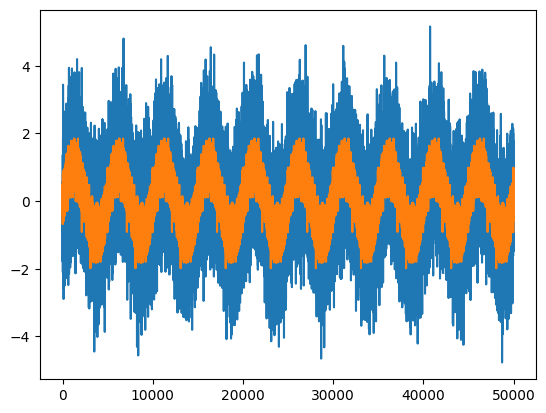

In [133]:
plt.plot(y)
plt.plot(np.tile(getY(y), n))

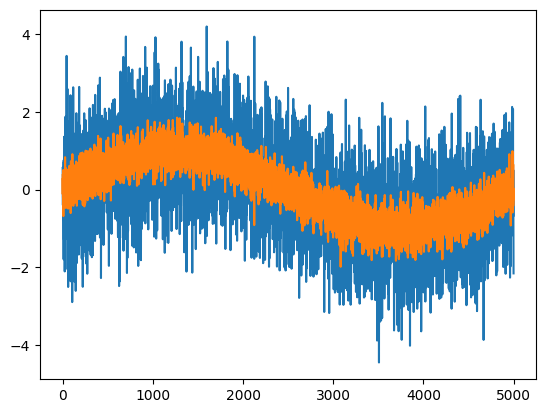

In [134]:
plt.plot(y[:T])
plt.plot(getY(y))

2. **Solve the minimization problem:**

$$
r = \min\limits_Y \left[ \sum\limits_{i=0}^{t-1} |y_i - Y_{i mod T}|^2 + \gamma \sum\limits_{i=0}^{T - 1}(Y_i - Y_{i+1})^2 \right]
$$

**by reducing it to linear system $AY = b$**.

$$
\frac{dr}{dY_j} = \left[\sum\limits_{i=0}^{n}2(y_{iT+j} - Y_j)(-1)\right] + \gamma(-2(Y_{j-1} - Y_j) + 2(Y_j - Y_{j+1})) = 0
$$

$$
-2\sum\limits_{i=0}^{n-1}(y_{iT+j} - Y_j) + \gamma4Y_j - \gamma2Y_{j-1} - \gamma2Y_{j+1} = 0
$$

$$
-\sum\limits_{i=0}^{n-1}y_{iT+j} + nY_j + \gamma 2Y_j - \gamma Y_{j-1} - \gamma Y_{j+1} = 0
$$

$$
 (n + 2\gamma)Y_j - \gamma Y_{j-1} - \gamma Y_{j+1} = \sum\limits_{i=0}^{n-1}y_{iT+j}
$$


So, it's equal to

$$AY = b$$

, with
$$
A = \left(\begin{matrix}
n + 2\gamma & -\gamma & 0 & 0 & 0 & 0 ... \\
-\gamma & n + 2\gamma & -\gamma & 0 & 0 ... \\
0 & -\gamma & n + 2\gamma & -\gamma & 0 ... \\...\\
... & 0 & 0 & 0 & -\gamma & n + 2\gamma
\end{matrix}\right)
$$

$$
b = \left(\begin{matrix}
\sum\limits_{i=0}^{n-1}y_{iT+1} \\
\sum\limits_{i=0}^{n-1}y_{iT+2} \\
...
\end{matrix}\right)
$$

In [135]:
b = np.zeros(T)
for j in range(T):
  b[j] = sum([y[i*T + j] for i in range(n)])

In [136]:
def getA(gamma):
  diag = np.zeros(T) + n + gamma*2
  udiag = np.zeros(T) - gamma
  ldiag = np.zeros(T) - gamma
  A = scipy.sparse.diags([diag, udiag, ldiag], [0, 1, -1], shape=(T, T), format='csr')
  return A

In [137]:
def solve(gamma):
  A = getA(gamma=gamma)
  #Y_sol = np.linalg.solve(A.todense(), b)
  Y_sol = scipy.sparse.linalg.spsolve(A, b)
  plt.plot(y[:T])
  plt.plot(Y_sol)

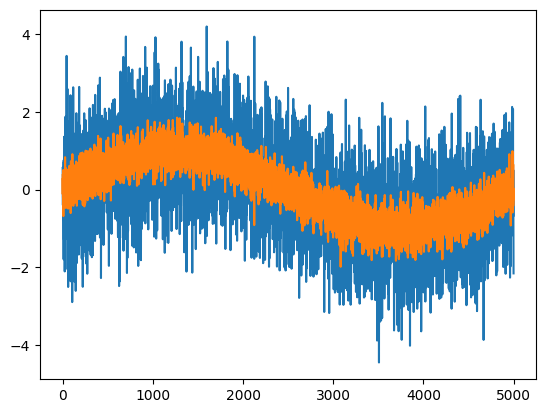

In [138]:
solve(gamma=0)

With $\gamma = 0$ solution is equal to initial analytical solution.

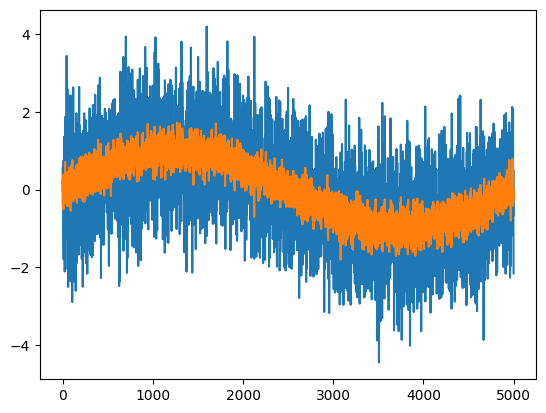

In [139]:
solve(gamma=1.0)

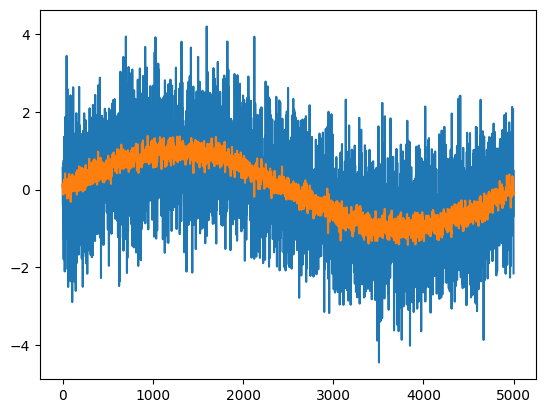

In [140]:
solve(gamma=10)

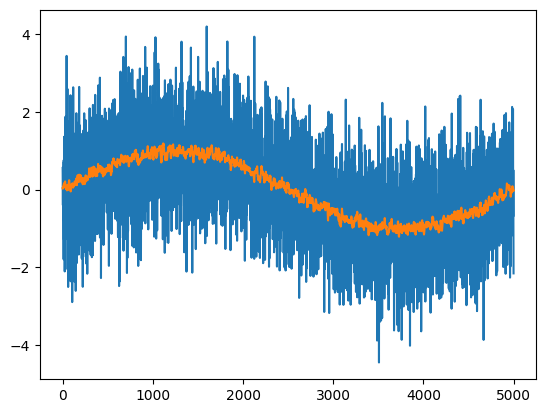

In [141]:
# Too much punishment for non-smoothness removes most of the noise
solve(gamma=100)

## Task 7

In [142]:
import numpy as np
import matplotlib.pyplot as plt
import scipy

$$
p_i =\sum\limits_{j} \frac{p_j}{L(j)}l_{ij}
$$

L(j) - number of links from j,

$l_{ij} = 1$ if j-th page refers to i-th,

$p_i$ - importance of i-th page

$$
p = Gp, G_{ij} = \frac{l_{ij}}{L(j)}
$$

$$
G -> \beta G + \frac{1-\beta}{n}ee^T
$$

, 0 < \beta < 1

, e - vector of ones

$$
(\hat 1 - \beta G)p = \frac{1 - \beta}{n}e
$$

In [143]:
graph = {
    'Code da Vinci': ['book', 'Dan Braun'],
    'Dan Braun': ['Code da Vinci', 'author', 'Italy', 'book'],
    'book': ['novel'],
    'author': ['Dostoevsky', 'Dan Braun', 'Umbert Eco'],
    'novel': ['The name of the Rose', 'Code da Vinci', 'book'],
    'Italy': ['Umbert Eco'],
    'religion': ['Dostoevsky', 'Italy'],
    'Dostoevsky': ['novel', 'author', 'book'],
    'Umbert Eco': ['novel', 'author', 'The name of the Rose', 'Italy'],
    'The name of the Rose': ['book', 'Umbert Eco'],
    'greatest authors of all time': ['Dostoevsky']
}

N = len(graph)

In [144]:
index = dict(enumerate(graph))
name2index = {val:key for key, val in index.items()}
index

{0: 'Code da Vinci',
 1: 'Dan Braun',
 2: 'book',
 3: 'author',
 4: 'novel',
 5: 'Italy',
 6: 'religion',
 7: 'Dostoevsky',
 8: 'Umbert Eco',
 9: 'The name of the Rose',
 10: 'greatest authors of all time'}

In [145]:
# L[j] - number of links from j
L = [len(graph[index[j]]) for j in range(N)]
L

[2, 4, 1, 3, 3, 1, 2, 3, 4, 2, 1]

In [146]:
# 𝑙𝑖𝑗 = 1 if j-th page refers to i-th
l = np.zeros(shape=(N, N))
for j in range(N):
  for ref in graph[index[j]]:
    i = name2index[ref]
    l[i][j] = 1
l

array([[0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [1., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0.],
       [0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0.],
       [0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [147]:
G = np.array([
    [l[i][j] / L[j] for j in range(N)] for i in range(N)
])

for j in range(N):
  if max(G[:, j]) == 0:
    G[:, j] = 1/N

G

array([[0.        , 0.25      , 0.        , 0.        , 0.33333333,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.5       , 0.        , 0.        , 0.33333333, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.5       , 0.25      , 0.        , 0.        , 0.33333333,
        0.        , 0.        , 0.33333333, 0.        , 0.5       ,
        0.        ],
       [0.        , 0.25      , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.33333333, 0.25      , 0.        ,
        0.        ],
       [0.        , 0.        , 1.        , 0.        , 0.        ,
        0.        , 0.        , 0.33333333, 0.25      , 0.        ,
        0.        ],
       [0.        , 0.25      , 0.        , 0.        , 0.        ,
        0.        , 0.5       , 0.        , 0.25      , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.

In [148]:
beta = 0.8

A = np.eye(N) - beta*G
b = (1 - beta) / N * np.ones(N)
p = np.linalg.solve(A, b)

values = {index[i]: p[i] for i in range(N)}
sorted_values = {k: val for k, val in sorted(values.items(), key=lambda item: item[1], reverse=True)}
for k, v in sorted_values.items():
  print(f'{k}: {v:.5f}')

novel: 0.20079
book: 0.17580
Umbert Eco: 0.12995
The name of the Rose: 0.09772
Code da Vinci: 0.08624
author: 0.07467
Dan Braun: 0.07259
Italy: 0.06596
Dostoevsky: 0.05991
religion: 0.01818
greatest authors of all time: 0.01818


Two last items get the same small 'importance' because they are not referenced by any other page.

### Gnutella dataset

In [149]:
!wget https://snap.stanford.edu/data/p2p-Gnutella09.txt.gz
!ls

--2023-12-16 12:47:52--  https://snap.stanford.edu/data/p2p-Gnutella09.txt.gz
Resolving snap.stanford.edu (snap.stanford.edu)... 171.64.75.80
Connecting to snap.stanford.edu (snap.stanford.edu)|171.64.75.80|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 80846 (79K) [application/x-gzip]
Saving to: ‘p2p-Gnutella09.txt.gz’

p2p-Gnutella09.txt. 100%[===================>]  78.95K   412KB/s    in 0.2s    

2023-12-16 12:47:52 (412 KB/s) - ‘p2p-Gnutella09.txt.gz’ saved [80846/80846]

data.pkl  p2p-Gnutella09.txt  p2p-Gnutella09.txt.gz  sample_data  web-Stanford.txt  y.npy


In [150]:
!gzip -df p2p-Gnutella09.txt.gz && ls

data.pkl  p2p-Gnutella09.txt  sample_data  web-Stanford.txt  y.npy


In [151]:
!head -n10 p2p-Gnutella09.txt

# Directed graph (each unordered pair of nodes is saved once): p2p-Gnutella09.txt 
# Directed Gnutella P2P network from August 9 2002
# Nodes: 8114 Edges: 26013
# FromNodeId	ToNodeId
0	1
0	2
0	3
0	4
0	5
0	6


In [152]:
data = {}
with open("p2p-Gnutella09.txt") as gnutella:
    for line in gnutella.readlines():
        if line[0] == '#': continue
        f, t = line.replace('\n', '').split('\t')
        f = int(f)
        t = int(t)
        if f not in data: data[f] = []
        data[f].append(t)

def get_page_num(data):
  N = 0
  for k, v in data.items():
    if k > N: N = k
    if max(v) > N: N = max(v)
  return N + 1

N = get_page_num(data)
N

8114

In [153]:
def getDenseG(data, N):
  G = np.array([
    [1 / len(data[j]) if (i in data.get(j, [])) else 0 for j in range(N)]
        for i in range(N)
  ])
  for j in range(N):
    if max(G[:, j]) == 0:
      G[:, j] = 1/N
  return G

def calculate_dense(data, N):
    beta = 0.8

    G = getDenseG(data, N)

    A = np.eye(N) - beta*G
    b = (1 - beta) / N * np.ones(N)
    return np.linalg.solve(A, b)

def print_res(res):
  values = dict(enumerate(res))
  sorted_values = [(k, val) for k, val in sorted(values.items(), key=lambda item: item[1], reverse=True)]
  for k, val in sorted_values[:20]:
    print(f'{k}: {val}')

In [154]:
%%timeit
calculate_dense(data, N)

45.7 s ± 821 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [155]:
res_dense = (calculate_dense(data, N))
print_res(res_dense)

351: 0.0014688800210253812
563: 0.0014314361823937526
822: 0.0013237943095997153
825: 0.001287178287529871
534: 0.0012854465710185877
565: 0.0012833344480483973
1389: 0.0012534206886726893
1126: 0.001232540239072705
356: 0.0012325006369165706
530: 0.0012250116657561846
352: 0.0012169032873341297
96: 0.0012053696120686611
51: 0.0012030625652383073
1042: 0.0012009629861759051
150: 0.0011472688642636076
752: 0.0011427508764555298
90: 0.0011420339118649275
836: 0.0011286894218776383
531: 0.0011271735488449998
706: 0.001118374193920562


Lets create G as sparse matrix

In [156]:
def getSparseG(data, N):
  row_idx = []
  col_idx = []
  values = []
  for f, tos in data.items():
    col_idx += [f]*len(tos)
    row_idx += tos
    values += [1/len(tos)]*len(tos)

  G = scipy.sparse.csc_matrix((values, (row_idx, col_idx)), shape=(N, N))

  # Skip this part because otherwise matrix will not be sparse anymore.
  #for j in range(N):
  #  if max(G[:, [j]]) == 0:
  #    G[:, [j]] = 1/N

  return G

def calculate_sparse(data, N):
    beta = 0.8

    G = getSparseG(data, N)

    A = scipy.sparse.diags([1], [0], shape=(N, N), format='csr') - beta*G
    b = (1 - beta) / N * np.ones(N)
    return scipy.sparse.linalg.spsolve(A, b)


In [157]:
%%timeit
calculate_sparse(data, N)

1.6 s ± 309 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [158]:
res_sparse = calculate_sparse(data, N)
print_res(res_sparse)

351: 0.0004338198229216125
563: 0.00042276113929043386
822: 0.0003909701301364921
825: 0.00038015593429812397
534: 0.00037964448820346566
565: 0.00037902069265869623
1389: 0.0003701859467233329
1126: 0.00036401910340166737
356: 0.00036400740727937273
530: 0.00036179561047081186
352: 0.00035940087758528787
96: 0.0003559945156703054
51: 0.00035531315120684355
1042: 0.00035469306038661124
150: 0.0003388350092684104
752: 0.0003375006642961811
90: 0.0003372889155847242
836: 0.00033334774666663694
531: 0.00033290004790215144
706: 0.0003303012416412571


In [159]:
sum(res_sparse)

0.29534054293881473

Top pages are the same, althought their ranks differ in absolute values. Also pages' ranks do not summ to 1 because I skipped normalization.

Lets analyse difference in ranks for other pages.

In [160]:
# Check ranks of which pages differ

def print_diff(res, candidate):
    res_dict = dict(enumerate(res))
    candidate_dict = dict(enumerate(candidate))

    res_rank = [k for k, val in sorted(res_dict.items(), key=lambda item: item[1], reverse=True)]
    candidate_rank = [k for k, val in sorted(candidate_dict.items(), key=lambda item: item[1], reverse=True)]
    page2candidate_rank = {page: i for i, page in enumerate(candidate_rank)}
    diff = []
    for i in range(N):
      candidate_rank_place = page2candidate_rank[res_rank[i]]
      diff.append(abs(i - candidate_rank_place))

    print(f'max diff in rank: {max(diff)}, avg diff: {sum(diff)/len(diff)}')

print_diff(res_dense, res_sparse)

max diff in rank: 70, avg diff: 0.9041163421247227


PageRanks differ, but not that big.

### Web-Stanford dataset using iterative method

In [161]:
!wget http://snap.stanford.edu/data/web-Stanford.txt.gz
!ls
#!gzip -df p2p-Gnutella09.txt.gz && ls
#!head -n10 p2p-Gnutella09.txt

--2023-12-16 12:55:00--  http://snap.stanford.edu/data/web-Stanford.txt.gz
Resolving snap.stanford.edu (snap.stanford.edu)... 171.64.75.80
Connecting to snap.stanford.edu (snap.stanford.edu)|171.64.75.80|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8908378 (8.5M) [application/x-gzip]
Saving to: ‘web-Stanford.txt.gz’

web-Stanford.txt.gz 100%[===================>]   8.50M  4.78MB/s    in 1.8s    

2023-12-16 12:55:02 (4.78 MB/s) - ‘web-Stanford.txt.gz’ saved [8908378/8908378]

data.pkl  p2p-Gnutella09.txt  sample_data  web-Stanford.txt  web-Stanford.txt.gz  y.npy


In [162]:
!gzip -df web-Stanford.txt.gz && ls

data.pkl  p2p-Gnutella09.txt  sample_data  web-Stanford.txt  y.npy


In [163]:
!head -n10 web-Stanford.txt

# Directed graph (each unordered pair of nodes is saved once): web-Stanford.txt 
# Stanford web graph from 2002
# Nodes: 281903 Edges: 2312497
# FromNodeId	ToNodeId
1	6548
1	15409
6548	57031
15409	13102
2	17794
2	25202


In [164]:
# Nodes start from 1, not zero. Will store them as before from zero for consistency
data_ws = {}
with open("web-Stanford.txt") as gnutella:
    for line in gnutella.readlines():
        if line[0] == '#': continue
        f, t = line.replace('\n', '').split('\t')
        f = int(f) - 1
        t = int(t) - 1
        if f not in data_ws: data_ws[f] = []
        data_ws[f].append(t)

N_ws = get_page_num(data_ws)
N_ws

281903

In [165]:
refs = [len(val) for k, val in data_ws.items()]
print(max(refs))
print(np.mean(refs))

255
8.208173754396924


Iterative solution:

$$
(\hat 1 - \beta G)p = \frac{1 - \beta}{n}e
$$

$$
p = \beta Gp + \frac{1 - \beta}{n}e
$$

In [166]:
def iterative_page_rank(beta, G, N):
  b = (1 - beta) / N * np.ones(N)
  # initially assign all pages equal page ranks
  p = np.array([1/N]*N)

  max_iter = 10000
  eps = 1e-16

  last_err = 1
  for i in range(max_iter):
    p_new = beta*G.dot(p) + b

    diff = p - p_new
    last_err = np.linalg.norm(diff)
    if last_err < eps:
      print(f'Convolved on {i} step, err = {last_err}')
      return p_new
    p = p_new

  print(f'Did not convolve, err = {last_err}')
  return p

In [167]:
res_iterative_ws = iterative_page_rank(beta=0.8, G=getSparseG(data_ws, N_ws), N=N_ws)
print_res(res_iterative_ws)
print(sum(res_iterative_ws))

# Note that page numbers start from 0, not 1, so to get actual page number add +1

Convolved on 134 step, err = 8.864731098731872e-17
89072: 0.01047462900648961
226410: 0.009610237777824517
241453: 0.008379659180437407
134831: 0.0032578572592332064
69357: 0.002731673891367669
67755: 0.002704544573083373
234703: 0.0026613086122579325
225871: 0.0025254553882219726
186749: 0.0024971047487378946
262859: 0.0024868369117870995
105606: 0.0024544089017506923
136820: 0.002326899509222851
68888: 0.0023063829312375507
231362: 0.0022916963720297666
272441: 0.002049887662886797
251795: 0.002049887662886796
95162: 0.002049887662886789
167294: 0.0020483027612905732
119478: 0.0019983171469756837
38341: 0.0018925660276605872
0.9982380296486221


So, page number **89073** has the largest rating.